In [1]:
# import pakcages
import pandas as pd
import numpy as np

In [2]:
# load Data Via Package
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Text Cleaning
import neattext.functions as nfx

In [4]:
# Load Dataset
df = pd.read_csv("emotion_dataset.csv")

In [5]:
# drop the unused column
df.drop(df.columns[[0, 3]], axis=1, inplace=True)

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
# shape
df.shape

(34792, 2)

In [8]:
# check the data types
df.dtypes

Emotion    object
Text       object
dtype: object

In [9]:
# check for any missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [10]:
# values counts of emotions
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [12]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [13]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [14]:
# Split the dataset
from sklearn.model_selection import train_test_split

In [15]:
# Build Features From Our Text
Xfeatures = df['Clean_Text']
yLabels = df['Emotion']

In [16]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

# Get Feaatures By Name
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [17]:
# load the ML Models
import joblib
nv_model = joblib.load("emotion_classifier_nv_model.sav")
lr_model = joblib.load("emotion_classifier_lr_model.sav")

In [32]:
# Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X, yLabels, test_size=0.45, random_state=42)

In [33]:
nv_model.score(X_test, y_test)

0.6146771412147921

In [34]:
lr_model.score(X_test, y_test)

0.7145685635817846

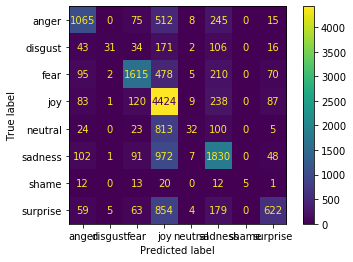

In [46]:
plot_nb = plot_confusion_matrix(nv_model, X_test,y_test)
plot_nb.figure_.savefig('nb_model.png',dpi=300)

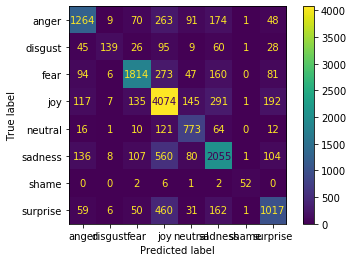

In [47]:
plot_lr = plot_confusion_matrix(lr_model, X_test,y_test)
plot_lr.figure_.savefig('lr_model.png',dpi=300)

In [38]:
# Interpret Model
import eli5

In [50]:
eli5.show_weights(lr_model, top=20)